<a href="https://colab.research.google.com/github/eliza-wollinger/digital-kaleidoscope/blob/main/kaleidoscope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install -q matplotlib pillow numpy imageio

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import imageio
from IPython.display import HTML
import io
import base64

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

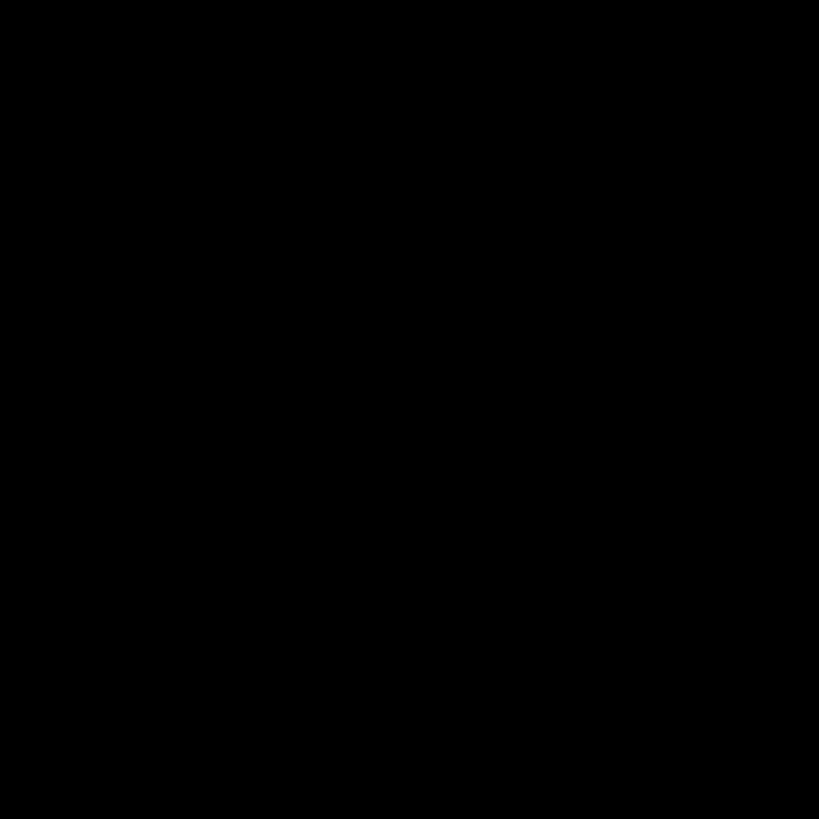

In [11]:
# Configurações
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.axis('off')

In [12]:
# Parâmetros
num_frames = 120  # Número frames
num_waves = 8     # Número ondas

x = np.linspace(-np.pi, np.pi, 400)
y = np.linspace(-np.pi, np.pi, 400)
X, Y = np.meshgrid(x, y)

In [13]:
def update(frame):
    ax.clear()
    ax.axis('off')

    t = frame * 0.1
    R = np.sqrt(X**2 + Y**2)  # Distância do centro

    patterns = []

    # Padrão 1: Ondas concêntricas
    pattern1 = np.sin(R * 8 + t * 2)

    # Padrão 2: Espirais
    theta = np.arctan2(Y, X)
    pattern2 = np.sin(theta * 6 + R * 4 - t * 3)

    # Padrão 3: Interferência de ondas
    pattern3 = np.sin(X * 6 + t) * np.cos(Y * 4 - t * 1.5)

    # Padrão 4: Distorção radial
    pattern4 = np.sin(R * 12 - t * 4 + np.sin(theta * 5) * 2)

    # Combinar padrões
    combined = (pattern1 * 0.4 + pattern2 * 0.3 + pattern3 * 0.2 + pattern4 * 0.3)

    # Aplicar máscara circular
    mask = R < np.pi
    combined = combined * mask

    # Adicionar efeito de cor
    im = ax.imshow(combined, cmap='hsv', extent=[-np.pi, np.pi, -np.pi, np.pi],
                   interpolation='bilinear', alpha=0.9)

    # Adicionar efeito de brilho no centro
    brightness = np.exp(-R*0.8) * (1 + 0.5 * np.sin(t * 3))
    brightness_effect = ax.imshow(brightness, cmap='hot', extent=[-np.pi, np.pi, -np.pi, np.pi],
                                  interpolation='bilinear', alpha=0.3)

    return [im, brightness_effect]

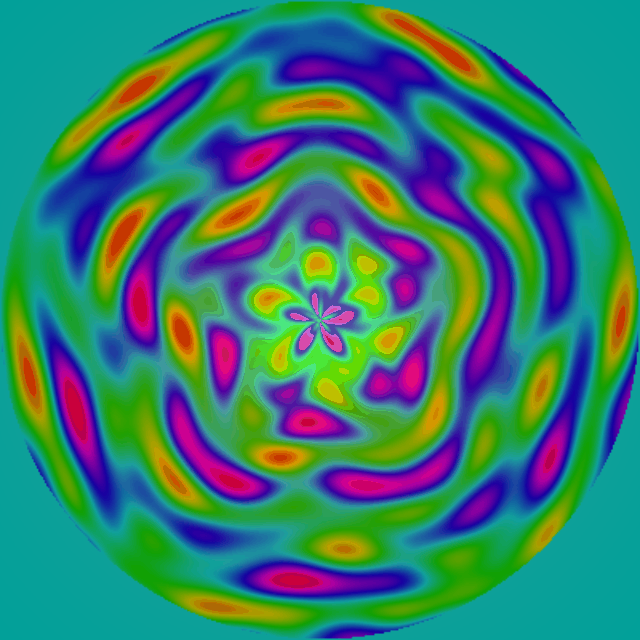

In [15]:
# Primeira animação
ani = FuncAnimation(fig, update, frames=num_frames, blit=True, interval=50)

# Exportar
gif_path = '/content/trippy_animation.gif'
ani.save(gif_path, writer='pillow', fps=20, dpi=80)

display(Image.open(gif_path))

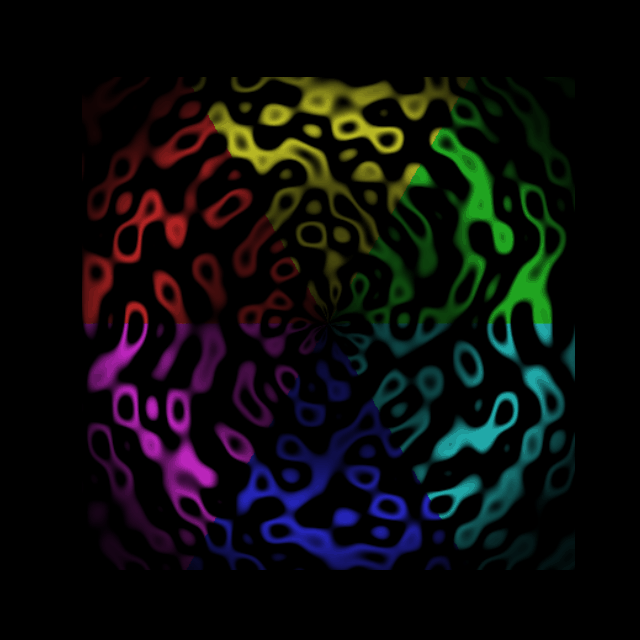

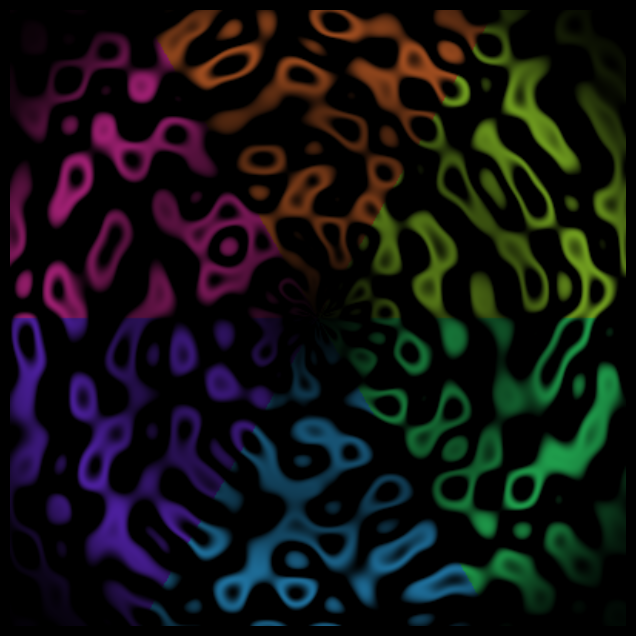

In [16]:
# Segunda animação
fig2, ax2 = plt.subplots(figsize=(8, 8), facecolor='black')
ax2.axis('off')

# Frames complexos
def update_psychedelic(frame):
    ax2.clear()
    ax2.axis('off')

    t = frame * 0.15
    R = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)

    # Múltiplas camadas
    layer1 = np.sin(R * 12 - t * 3) * np.cos(theta * 7 + t * 2)
    layer2 = np.sin(X * 10 + t * 2.5) * np.cos(Y * 8 - t * 1.8)
    layer3 = np.sin((X + np.sin(t) * 0.5) * 8) * np.cos((Y + np.cos(t) * 0.5) * 6)
    layer4 = np.sin(theta * 10 + R * 6 - t * 4)

    # Combinação não-linear
    combined = (np.tanh(layer1 * 0.8 + layer2 * 0.6) +
                np.sin(layer3 * 1.2) * 0.5 +
                layer4 * 0.4)

    # Distorção da onda
    wave_distortion = np.sin(R * 5 - t * 2) * 0.3
    combined = np.sin(combined * 3 + wave_distortion)

    mask = np.exp(-(R - np.pi*0.7)**2 / 2)
    combined = combined * mask

    regions = np.floor((theta + np.pi) / (np.pi / 3)) % 6
    combined_colored = np.zeros((400, 400, 3))

    for i in range(6):
        region_mask = (regions == i)
        hue = (i / 6 + t * 0.05) % 1.0

        # Converter HSV para RGB
        from colorsys import hsv_to_rgb
        r, g, b = hsv_to_rgb(hue, 0.8, 0.8)
        combined_colored[region_mask, 0] = combined[region_mask] * r
        combined_colored[region_mask, 1] = combined[region_mask] * g
        combined_colored[region_mask, 2] = combined[region_mask] * b

    pulse = np.sin(R * 3 - t * 5) * 0.3 + 0.7
    combined_colored *= pulse[:, :, np.newaxis]

    ax2.imshow(combined_colored, extent=[-np.pi, np.pi, -np.pi, np.pi],
               interpolation='bilinear')

    return [ax2.images[0]]

# Exportar
ani2 = FuncAnimation(fig2, update_psychedelic, frames=num_frames, blit=True, interval=50)
gif_path2 = '/content/psychedelic_animation.gif'
ani2.save(gif_path2, writer='pillow', fps=20, dpi=80)

display(Image.open(gif_path2))

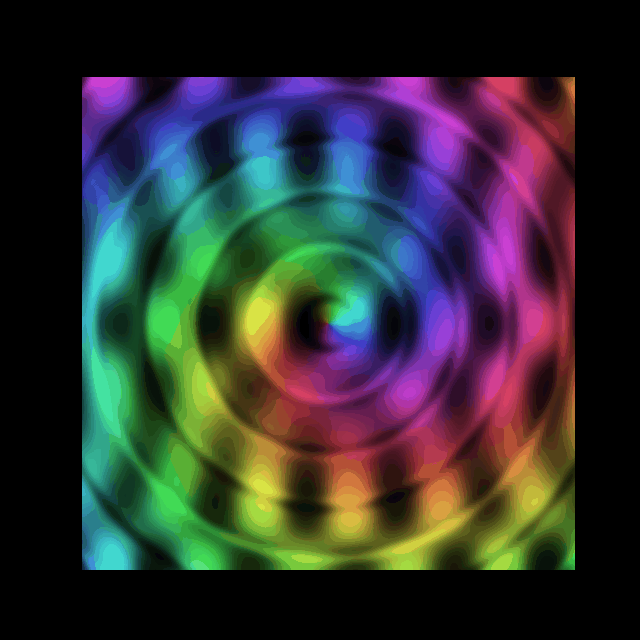

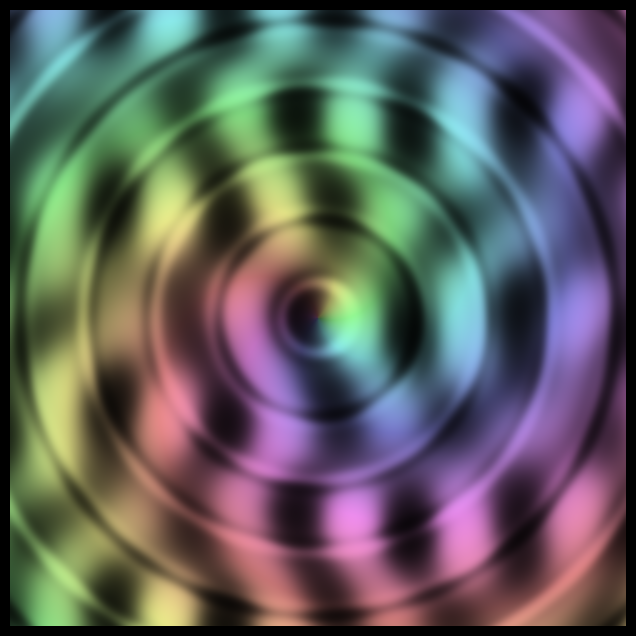

In [17]:
# Terceira animação
fig3, ax3 = plt.subplots(figsize=(8, 8), facecolor='black')
ax3.axis('off')

def update_geometric(frame):
    ax3.clear()
    ax3.axis('off')

    t = frame * 0.1
    R = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)

    # Padrão geométrico hexagonal
    hex_pattern = np.sin(X * 6 + t * 2) + np.sin((X * np.sqrt(3) + Y) * 3) + np.sin((X * np.sqrt(3) - Y) * 3)

    # Adicionar rotação
    rot_angle = t * 0.5
    X_rot = X * np.cos(rot_angle) - Y * np.sin(rot_angle)
    Y_rot = X * np.sin(rot_angle) + Y * np.cos(rot_angle)

    # Padrão quadrado rotacionado
    square_pattern = np.sin(X_rot * 5) * np.cos(Y_rot * 5)

    # Padrão de anéis concêntricos pulsantes
    ring_pattern = np.sin(R * 15 - t * 4) * np.exp(-(np.mod(R * 3 + t, 2) - 1)**2 * 10)

    # Combinar padrões
    combined = np.tanh(hex_pattern * 0.4 + square_pattern * 0.3 + ring_pattern * 0.5)

    # Adicionar gradiente de cor
    color_shift = (theta + np.pi) / (2 * np.pi) + t * 0.1
    from colorsys import hsv_to_rgb

    h = (R / np.pi * 0.5 + t * 0.05 + color_shift) % 1.0
    s = 0.7 + 0.3 * np.sin(t * 2)
    v = 0.5 + 0.5 * combined

    # Converter HSV para RGB
    img_rgb = np.zeros((400, 400, 3))
    for i in range(400):
        for j in range(400):
            r, g, b = hsv_to_rgb(h[i, j], s, v[i, j])
            img_rgb[i, j, 0] = r
            img_rgb[i, j, 1] = g
            img_rgb[i, j, 2] = b

    ax3.imshow(img_rgb, extent=[-np.pi, np.pi, -np.pi, np.pi],
               interpolation='bilinear')

    return [ax3.images[0]]

# Exportar
ani3 = FuncAnimation(fig3, update_geometric, frames=num_frames, blit=True, interval=50)
gif_path3 = '/content/geometric_animation.gif'
ani3.save(gif_path3, writer='pillow', fps=20, dpi=80)

display(Image.open(gif_path3))

In [18]:
print(f"1. {gif_path}")
print(f"2. {gif_path2}")
print(f"3. {gif_path3}")

1. /content/trippy_animation.gif
2. /content/psychedelic_animation.gif
3. /content/geometric_animation.gif
